### Importación de datos



In [ ]:
import pandas as pd


url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()
#tienda2.info()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,"164,300","6,900",16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,5,-74
1,Mesa de comedor,Muebles,"192,300","8,400",18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6,-76
2,Juego de mesa,Juguetes,"209,600","15,900",15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10,-76
3,Microondas,Electrodomésticos,"757,500","41,000",03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3,-77
4,Silla de oficina,Muebles,"335,200","20,200",07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6,-76


In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
#Creamos una lista de las tiendas
list_tiendas=[tienda1, tienda2, tienda3, tienda4]
diccionario_tiendas={'Tienda 1': tienda1, 'Tienda 2': tienda2, 'Tienda 3': tienda3, 'Tienda 4': tienda4}

In [ ]:
"""
Calcula y muestra el promedio de una columna específica
(como calificación, costo de envío, etc.) por tienda.
También identifica la tienda con el menor promedio y muestra
el promedio general. Permite personalizar el formato de salida
para mostrar números con decimales o formato monetario.
"""

def calcular_promedio_por_tienda(diccionario_tiendas, columna, titulo, es_monto=False):
    print(f'===={titulo} promedio por cada tienda===')
    promedios = []
    total_general = 0
    tienda_menor_promedio = None
    menor_promedio = float('inf')

    for nombre_tienda, datos_tienda in diccionario_tiendas.items():
        suma = datos_tienda[columna].sum()
        cantidad = len(datos_tienda)
        promedio = suma / cantidad

        promedios.append(promedio)
        total_general += promedio

        if es_monto:
            print(f'\t{nombre_tienda}: ${promedio:,.0f}')
        else:
            print(f'\t{nombre_tienda}: {promedio:.2f}')

        if promedio < menor_promedio:
            menor_promedio = promedio
            tienda_menor_promedio = nombre_tienda

    print(f'\n===={titulo} promedio general de todas las tiendas===')
    if es_monto:
        print(f'Promedio general: ${total_general / len(diccionario_tiendas):,.0f}')
    else:
        print(f'Promedio general: {total_general / len(diccionario_tiendas):.2f}')

    print(f'\n====Tienda con menor {titulo.lower()}===')
    if es_monto:
        print(f'{tienda_menor_promedio}, con un {titulo.lower()} promedio de: ${menor_promedio:,.0f}')
    else:
        print(f'{tienda_menor_promedio}, con un {titulo.lower()} promedio de: {menor_promedio:.2f}')


#1. Análisis de facturación



In [ ]:
print('====Facturacion total por cada tienda===')
totales=[]
total_gral = 0
tienda_menor_desempeno=None
total_menor_desempeno= float('inf')

#Recorremos el diccionario de tiendas y sumamamos los totales de ventas e identificamos la tienda con menor desempeño
for nombre_tienda, DF in diccionario_tiendas.items():
  total=DF["Precio"].sum()
  totales.append(total)
  total_gral+=total
  print(f'\t{nombre_tienda}: ${total:,.0f}')
  if total < total_menor_desempeno:#Identificamos el menor desempeño
    total_menor_desempeno=total
    tienda_menor_desempeno=nombre_tienda

print(f'\n====Suma de facturaión de===')
print(f'Total general: ${total_gral:,.0f}')

#Identificamos la tienda cn menor desempeño
print(f'\n====Tenada con menor desempeño===')
print(f'{tienda_menor_desempeno}, con una facturación total de: ${total_menor_desempeno:,.0f}')



====Facturacion total por cada tienda===
	Tienda 1: $1,150,880,400
	Tienda 2: $1,116,343,500
	Tienda 3: $1,098,019,600
	Tienda 4: $1,038,375,700

====Suma de facturaión de===
Total general: $4,403,619,200

====Tenada con menor desempeño===
Tienda 4, con una facturación total de: $1,038,375,700


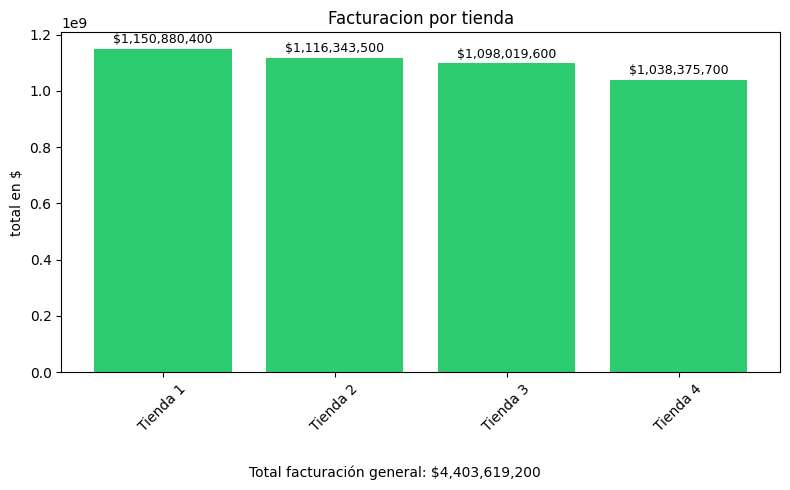

In [ ]:
#Creamos un grafico de barras para representacion visual de los datos
nombres_tiendas=list(diccionario_tiendas.keys())
totales_ventas=[DF["Precio"].sum() for DF in diccionario_tiendas.values()]

#Creación del gráfico
plt.figure(figsize=(8,5))
plt.bar(nombres_tiendas, totales_ventas, color='#2ecc71')
plt.title(f'Facturacion por tienda')
plt.suptitle(f'\nTotal facturación general: ${total_gral:,.0f}', fontsize=10, y=0)
plt.ylabel('total en $')
plt.xticks(rotation=45)
for i, total in enumerate(totales_ventas):#Agregamos los totatlaes de facturacion en las columnas
    plt.text(i, total + 10_000_000, f"${total:,.0f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [ ]:
#Imprimimos las categorias y su popularidad por tienda
conteo_global = Counter()
print('=== Cantidad de ventas por Categorias de productos en cada tinda ===\n')

#Recorrido por las
for nombre_tienda, df in diccionario_tiendas.items():
 # print(f'{nombre_tienda}:')
  conteo_categoria=df['Categoría del Producto'].value_counts()
  total_por_categoria=df.groupby('Categoría del Producto')['Precio'].sum()
  for categoria, cantidad in conteo_categoria.items():
   # print(f' - {categoria}: {cantidad} - {total_por_categoria}')
    conteo_global[categoria] += cantidad

print(f'\n===Numero de ventas por categoría===')
for categoria, total in conteo_global.most_common():
   print(f'{categoria}: {total}')

print(f'\n===Categoría más popular===')
categoria_mas_popular, cantidad_mas_alta = conteo_global.most_common(1)[0]
print(f'{categoria_mas_popular} ({cantidad_mas_alta} productos)')




=== Cantidad de ventas por Categorias de productos en cada tinda ===


===Numero de ventas por categoría===
Muebles: 1920
Electrónicos: 1804
Juguetes: 1352
Deportes y diversión: 1108
Electrodomésticos: 1016
Artículos para el hogar: 804
Libros: 748
Instrumentos musicales: 680
nan: 3

===Categoría más popular===
Muebles (1920 productos)


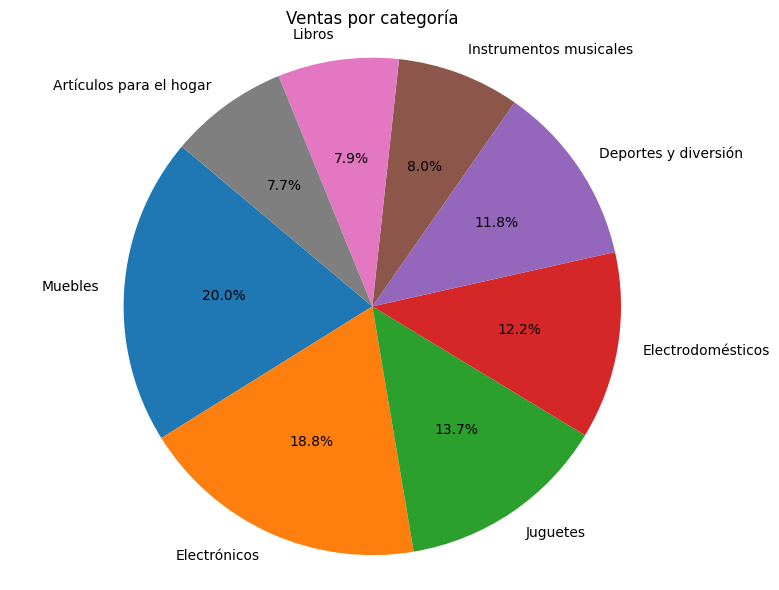

In [ ]:
# Datos desde el conteo_global que ya generaste
labels = list(conteo_global.keys())
sizes = list(conteo_global.values())

# Gráfico Pie
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Hace que el gráfico sea un círculo
plt.title('Ventas por categoría')
plt.tight_layout()
plt.show()



# 3. Calificación promedio de la tienda


In [ ]:

calcular_promedio_por_tienda(diccionario_tiendas, 'Calificación', 'Calificación')



====Calificación promedio por cada tienda===
	Tienda 1: 3.98
	Tienda 2: 4.04
	Tienda 3: 4.05
	Tienda 4: 4.00

====Calificación promedio general de todas las tiendas===
Promedio general: 4.01

====Tienda con menor calificación===
Tienda 1, con un calificación promedio de: 3.98


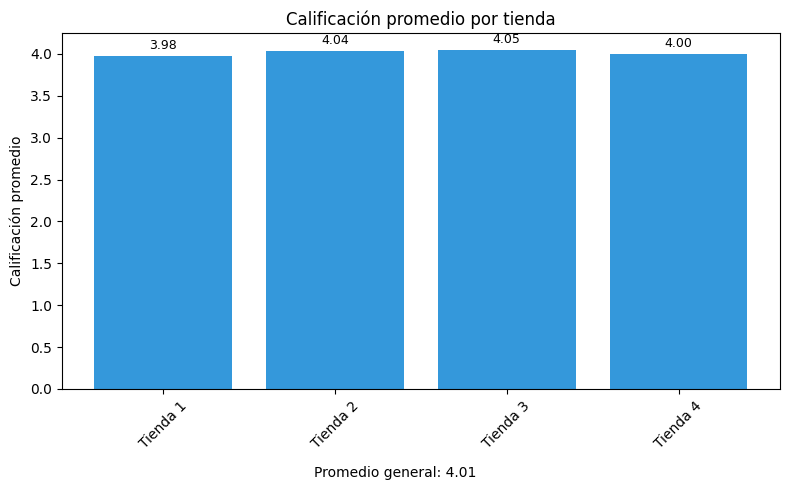

In [ ]:
# Calculamos las calificaciones promedio por tienda
nombres_tiendas=list(diccionario_tiendas.keys())
calificaciones_promedio=[datos['Calificación'].mean() for datos in diccionario_tiendas.values()]

# Calculo del promedio general de calificaciones
promedio_general=sum(calificaciones_promedio) / len(calificaciones_promedio)

# Creación del gráfico
plt.figure(figsize=(8,5))
plt.bar(nombres_tiendas, calificaciones_promedio, color='#3498db')
plt.title('Calificación promedio por tienda')
plt.suptitle(f'Promedio general: {promedio_general:.2f}', fontsize=10, y=0)
plt.ylabel('Calificación promedio')
plt.xticks(rotation=45)

# Mostramos las calificaciones encima de las barras
for i, promedio in enumerate(calificaciones_promedio):
    plt.text(i, promedio + 0.05, f"{promedio:.2f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


# 4. Productos más y menos vendidos

In [ ]:
print("====Producto más y menos vendido (Global, en todas las tiendas)====")

# Diccionario para acumular las apariciones de cada producto
ventas_productos_global = {}

for nombre_tienda, DF in diccionario_tiendas.items():
    for producto in DF['Producto']:
        if producto in ventas_productos_global:
            ventas_productos_global[producto] += 1
        else:
            ventas_productos_global[producto] = 1

# Identificamos el producto más vendido
producto_mas_vendido = max(ventas_productos_global, key=ventas_productos_global.get)
ventas_mas_altas = ventas_productos_global[producto_mas_vendido]

# Identificamos el producto menos vendido
producto_menos_vendido = min(ventas_productos_global, key=ventas_productos_global.get)
ventas_mas_bajas = ventas_productos_global[producto_menos_vendido]

# Resultados
print(f"\nProducto más vendido: {producto_mas_vendido} ({ventas_mas_altas} ventas)")
print(f"Producto menos vendido: {producto_menos_vendido} ({ventas_mas_bajas} ventas)")


====Producto más y menos vendido (Global, en todas las tiendas)====

Producto más vendido: Mesa de noche (210 ventas)
Producto menos vendido: Celular ABXY (157 ventas)


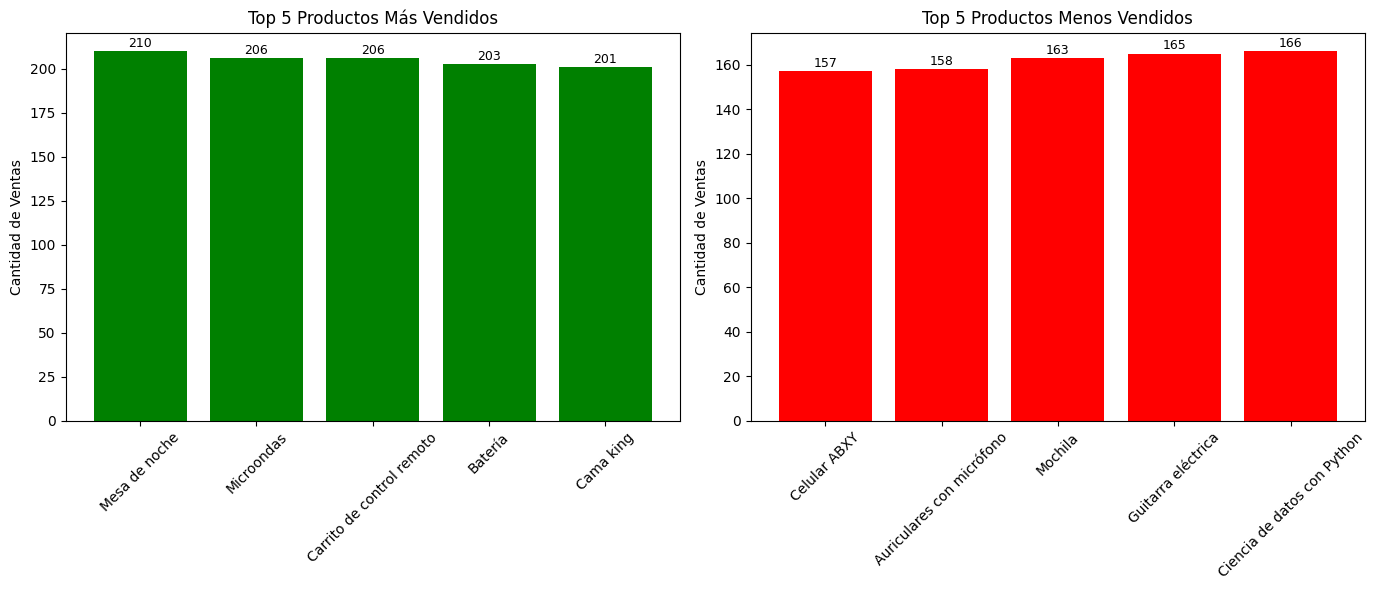

In [ ]:
# Contamos apariciones de productos en todas las tiendas
conteo_productos = {}
for tienda in diccionario_tiendas.values():
    for producto in tienda['Producto'].dropna():
        conteo_productos[producto] = conteo_productos.get(producto, 0) + 1

# Obtenemos el top 5 más vendidos y menos vendidos
top5_mas = sorted(conteo_productos.items(), key=lambda x: x[1], reverse=True)[:5]
top5_menos = sorted(conteo_productos.items(), key=lambda x: x[1])[:5]

# Separar nombres y cantidades
nombres_mas, cantidades_mas = zip(*top5_mas)
nombres_menos, cantidades_menos = zip(*top5_menos)

# Creamos la figura con dos subplots
plt.figure(figsize=(14, 6))

# Gráfico de los más vendidos
plt.subplot(1, 2, 1)
plt.bar(nombres_mas, cantidades_mas, color='green')
plt.title('Top 5 Productos Más Vendidos')
plt.ylabel('Cantidad de Ventas')
plt.xticks(rotation=45)
for i, cantidad in enumerate(cantidades_mas):
    plt.text(i, cantidad + 0.5, str(cantidad), ha='center', va='bottom', fontsize=9)

# Gráfico de los menos vendidos
plt.subplot(1, 2, 2)
plt.bar(nombres_menos, cantidades_menos, color='red')
plt.title('Top 5 Productos Menos Vendidos')
plt.ylabel('Cantidad de Ventas')
plt.xticks(rotation=45)
for i, cantidad in enumerate(cantidades_menos):
    plt.text(i, cantidad + 0.5, str(cantidad), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


# 5. Envío promedio por tienda

In [ ]:
calcular_promedio_por_tienda(diccionario_tiendas, 'Costo de envío', 'Costo de envío', es_monto=True)


====Costo de envío promedio por cada tienda===
	Tienda 1: $26,019
	Tienda 2: $25,216
	Tienda 3: $24,806
	Tienda 4: $23,459

====Costo de envío promedio general de todas las tiendas===
Promedio general: $24,875

====Tienda con menor costo de envío===
Tienda 4, con un costo de envío promedio de: $23,459


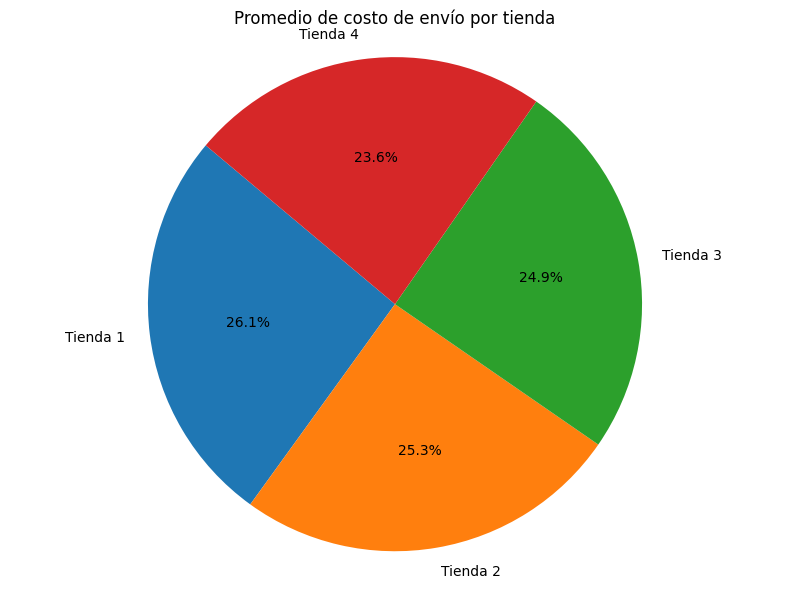

In [ ]:
promedios_envios = {}

for nombre_tienda, df in diccionario_tiendas.items():
    promedio_envio = df['Costo de envío'].mean()  # Calculamos el promedio de costo de envío por tienda
    promedios_envios[nombre_tienda] = promedio_envio

# Extraemos los datos del diccionario para el gráfico
labels = list(promedios_envios.keys())
sizes = list(promedios_envios.values())

# Gráfico Pie
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Hace que el gráfico sea un círculo
plt.title('Promedio de costo de envío por tienda')
plt.tight_layout()
plt.show()


**Conclusiones**
En cuanto a las cifras estudiadas, la **Tienda 1**, es la que presenta una mayor facturación, con un total de $1.150.880.400.

En términos generales, las tiendas presentan un buen ritmo de ventas, lo cual desvela que las tiendas estan siendo corrrectamente administradas.

La Tienda 4, aunque tiene el costo de envío más bajo, también se encuentra en la posición de menor facturación con **$1,038,375,700**. Esto sugiere que, a pesar de la eficiencia en costos de envío, esta tienda podría mejorar en términos de volumen de ventas o marketing para incrementar sus ingresos.

***Categoría más Vendida:***En cuanto a la categoría más popular, los Muebles lideran con un total de 1920 productos vendidos, destacándose sobre otras categorías como Electrónicos (1804) y Juguetes (1352). Esta es una categoría clave para las ventas globales, reflejando una demanda importante por estos productos.

***Calificación Promedio:***    Las calificaciones promedio de cada tienda varían ligeramente, con la Tienda 3 obteniendo la mejor calificación con 4.05. La Tienda 1 tiene la menor calificación, con 3.98. El promedio general de todas las tiendas es 4.01, lo cual es un buen indicador de satisfacción del cliente, pero hay margen de mejora, especialmente en la Tienda 1.

**Producto Más y Menos Vendido:**  El producto más vendido es la Mesa de noche con 210 ventas, mientras que el producto menos vendido es el Celular ABXY, con 157 ventas. Esto podría indicar una preferencia por muebles en general, y tal vez una menor demanda por los productos electrónicos, específicamente los celulares.

En general, el desempeño de todas las tiendas es positivo, pero hay áreas clave en las que se pueden implementar mejoras para maximizar el rendimiento general.


***Recomendaciones:***
Para la Tienda 1: Podría enfocarse en mejorar la satisfacción del cliente, ya que tiene la menor calificación promedio (3.98). Mejorar la experiencia de compra podría elevar su calificación y, posiblemente, aumentar las ventas.      Para la Tienda 4: Aunque su costo de envío es el más bajo, su facturación es la más baja de todas. Es recomendable revisar estrategias de marketing y promover categorías populares como los Muebles, que han mostrado ser un gran éxito global.      Optimización en Logística: Todas las tiendas podrían investigar estrategias para reducir los costos de envío, especialmente las Tiendas 1, 2 y 3, que tienen un costo significativamente más alto.